In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [88]:
#source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

#import file into dataframe
data = pd.read_csv('ACS_17_5YR_city_ann.csv', encoding = "ISO-8859-1", low_memory = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574 entries, 0 to 3573
Columns: 611 entries, GEO.id to HC04_VC218
dtypes: object(611)
memory usage: 16.7+ MB


In [89]:
#create dictionary to translate description to code
dctry = dict(zip(data.columns, data.loc[0]))

#function to search for matching values
def search(values, searchFor):
    d = {}
    for i in searchFor:
        d.update(dict((k, values[k]) for k in values if i in values[k]))
    return d
a = search(dctry, ['Estimate; EDUCATION','Estimate; ANCESTRY'])
del a['HC01_VC95']
del a['HC01_VC96']

In [90]:
a = pd.Series(a).apply(lambda x: 'total' if len(x.split(' - ')) < 3 else x.split('-')[2]).str.strip().to_dict()
a = pd.Series(a).apply(lambda x: x.split('(')[0]).str.strip().to_dict()
a['HC01_VC85'] = 'total over 24'
a['HC01_VC185'] = 'total ancestry'
a['GEO.display-label'] = 'location'

In [91]:
df = data[list(a.keys())].drop(0)
df = df.rename(columns = a)

In [92]:
df = pd.melt(df, id_vars = ['location'], value_vars = df.columns.tolist()[:-1],
           var_name='group', value_name='estimate')
df.location = df.location.str.split('Urban', expand = True)[0]
df.estimate = df.estimate.astype('float')

In [133]:
ancestry = df.group.unique().tolist()[9:]
education_level = df.group.unique().tolist()[1:8]
df.group.unique()

array(['total over 24', 'Less than 9th grade',
       '9th to 12th grade, no diploma', 'High school graduate',
       'Some college, no degree', "Associate's degree",
       "Bachelor's degree", 'Graduate or professional degree',
       'total ancestry', 'American', 'Arab', 'Czech', 'Danish', 'Dutch',
       'English', 'French', 'French Canadian', 'German', 'Greek',
       'Hungarian', 'Irish', 'Italian', 'Lithuanian', 'Norwegian',
       'Polish', 'Portuguese', 'Russian', 'Scotch', 'Scottish', 'Slovak',
       'Subsaharan African', 'Swedish', 'Swiss', 'Ukrainian', 'Welsh',
       'West Indian'], dtype=object)

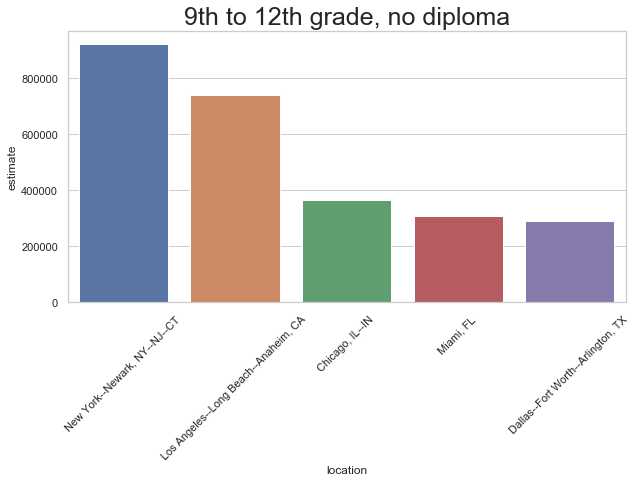

In [116]:
group = '9th to 12th grade, no diploma'
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()

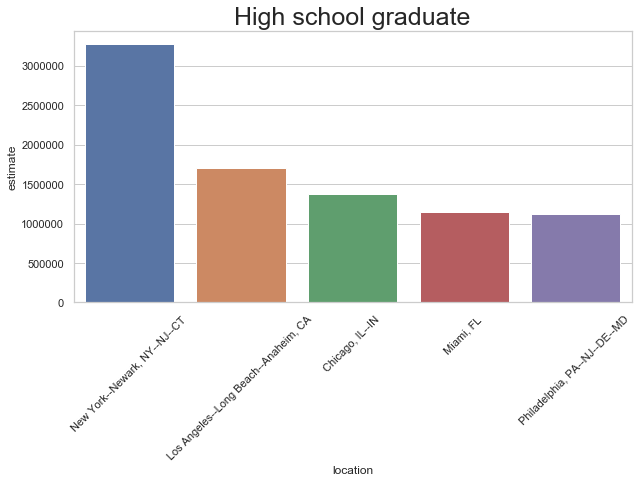

In [123]:
group = 'High school graduate'
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()

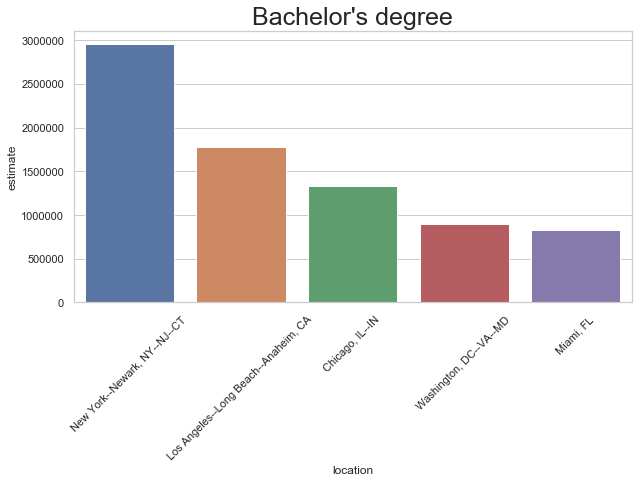

In [120]:
group = "Bachelor's degree"
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()

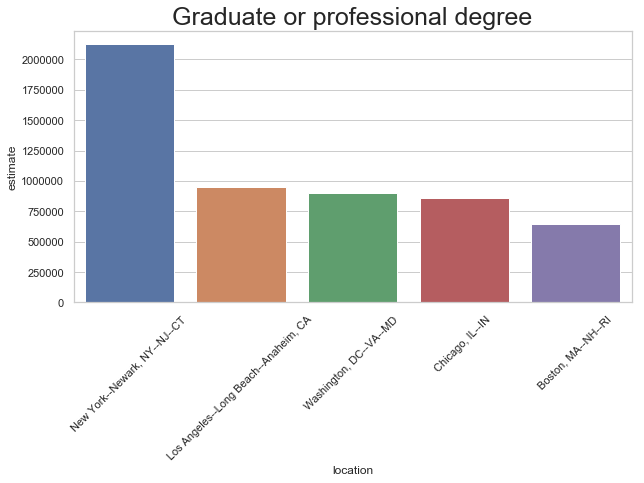

In [121]:
group ='Graduate or professional degree'
group_df = df[df.group == group].sort_values(by = 'estimate', ascending = False).head(5).reset_index(drop = True)
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = group_df, x = 'location', y = 'estimate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title(group, fontsize = 25)
plt.show()